# Packages and Functions

In [4]:
##### All packages 
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import imutils
import cv2
import random
import pickle
import os

from PIL import Image
from skimage import util
from os import rename
from subprocess import call
from pathlib import Path
from imutils import paths
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell #multiple outputs in notebook
InteractiveShell.ast_node_interactivity = "all"            #

In [ ]:
print(tf.__version__)
print(keras.backend.backend())

In [1]:
##### All Functions  

# Functions for Creating Database

def crop_image(left=100, right=275):
    '''Crops the note images in the directory. The size of a note preview is 354x175.'''

    for filename in os.listdir(temp_dir):

            image = cv2.imread(temp_dir + filename, cv2.IMREAD_GRAYSCALE)
            cropped = image[:, left:right]
            filename = filename.split('.p')[0]  # correctly slice the filename
            cv2.imwrite(os.path.join(complete_dataset, "{}.png".format(filename)), cropped)
                                   
def rotate_image(lower_bound=-3, upper_bound=3, steps=2):
    '''Creates rotations of all images'''

    for filename in os.listdir(temp_dir):
        if filename.endswith(".png"):

            image = cv2.imread(temp_dir + filename, cv2.IMREAD_GRAYSCALE)
            (rows, cols) = image.shape[:2]

            # getRotationMatrix2D creates a matrix needed for transformation.
            # We want matrix for rotation w.r.t center to 45 degree without scaling.

            for i in range(lower_bound, upper_bound + steps, steps):

                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), i, 1)
                rot = cv2.warpAffine(image,
                                     M, (cols, rows),
                                     borderMode=cv2.BORDER_CONSTANT,
                                     borderValue=(255, 255, 255))

                # Write image back to disk.
                cv2.imwrite(os.path.join(complete_dataset, 
                                         "{}-rotate-{}.png".format(filename.split('.png')[0], 
                                                                                  i)), rot)
                
def rename_files(directory):
    
    i = 1
    for path in Path(directory).glob('**/*.*'):
        new_name = path.parts[-1].split("-")[0] + '_image_' + str(i) + '.png'
        new_path = '/'.join(list(path.parts[:-1])+[new_name])
        os.rename(str(path), new_path)
        i += 1                 

# Functions for CNN
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img, cmap = 'gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
##### Paths 
dir_dataset = "/Users/annaleid/Documents/Jordy/Cropped Kleur/"
directory = "/Users/annaleid/Documents/Jordy/"
temp_dir = "/Users/annaleid/Documents/Jordy/TempDataset/"
complete_dataset = "/Users/annaleid/Documents/Jordy/Complete/"
models_dir = "/Users/annaleid/Documents/Jordy/Trained Models/"

# Creating Lilypond Database


In [ ]:
##### lilypond file formatting functions 

'''With this code the image files in Lilypond are created'''

def create_note_images():
    
    for i in notes:
        for j in note_values:

            my_file = "{}{}.ly".format(i,j) 
            writeFile = open(my_file, 'w')

    #the following string is lilypond mark-up to create all notes with their durations

            writeFile.write("""

            \\version \"2.18.2\"\n
            \\paper {
            \tline-width = 140\mm
            \toddHeaderMarkup = \"\"
            \tevenHeaderMarkup = \"\"
            \toddFooterMarkup = \"\"
            \tevenFooterMarkup = \"\"
            }
            \n
            \\score {
            \t\\new Staff {
            \t\t\\hide Staff.TimeSignature
            \t\t\\hide Staff.Clef
            \t\t%s%s}
            \n
            \layout {
            \t\context {
            \t\t\Score
            \t\t\override NoteHead.style = #\'petrucci
            \t\t\override SpacingSpanner.base-shortest-duration = #(ly:make-moment 1/32)
            \t\t\cadenzaOn}
            \t}
            }
            """ %(i,j))

            writeFile.close()
            
def create_longer_note_images():
    
    for i in notes:
        for j in longer_note_values:

            my_file = "{}{}.ly".format(i,j)
            writeFile = open(my_file, 'w')

    #the following string is lilypond mark-up to create all notes with their durations

            writeFile.write("""

            \\version \"2.18.2\"\n
            \\paper {
            \tline-width = 140\mm
            \toddHeaderMarkup = \"\"
            \tevenHeaderMarkup = \"\"
            \toddFooterMarkup = \"\"
            \tevenFooterMarkup = \"\"
            }
            \n
            \\score {
            \t\\new Staff {
            \t\t\\hide Staff.TimeSignature
            \t\t\\hide Staff.Clef
            \t\t%s\\%s}
            \n
            \layout {
            \t\context {
            \t\t\Score
            \t\t\override NoteHead.style = #\'petrucci
            \t\t\override SpacingSpanner.base-shortest-duration = #(ly:make-moment 1/32)
            \t\t\cadenzaOn}
            \t}
            }
            """ %(i,j))

            writeFile.close()
            
def create_rest_images():
   
    for j in rests:

        my_file = "{}.ly".format(j)
        writeFile = open(my_file, 'w')

    #the following string is lilypond mark-up to create all notes with their durations

        writeFile.write("""

        \\version \"2.18.2\"\n
        \\paper {
        \tline-width = 140\mm
        \toddHeaderMarkup = \"\"
        \tevenHeaderMarkup = \"\"
        \toddFooterMarkup = \"\"
        \tevenFooterMarkup = \"\"
        }
        \n
        \\score {
        \t\\new Staff {
        \t\t\\hide Staff.TimeSignature
        \t\t\\hide Staff.Clef
        \t\t\override Staff.Rest.style = #'mensural
        \t\t%s}
        \n
        \layout {
        \t\context {
        \t\t\Score
        \t\t\override NoteHead.style = #\'petrucci
        \t\t\override SpacingSpanner.base-shortest-duration = #(ly:make-moment 1/32)
        \t\t\cadenzaOn}
        \t}
        }
        """ %(j))

        writeFile.close()
    
def create_longer_rest_images():
    
    for j in longer_note_values:

        my_file = "{}.ly".format(j)
        writeFile = open(my_file, 'w')

    #the following string is lilypond mark-up to create all notes with their durations

        writeFile.write("""

        \\version \"2.18.2\"\n
        \\paper {
        \tline-width = 140\mm
        \toddHeaderMarkup = \"\"
        \tevenHeaderMarkup = \"\"
        \toddFooterMarkup = \"\"
        \tevenFooterMarkup = \"\"
        }
        \n
        \\score {
        \t\\new Staff {
        \t\t\\hide Staff.TimeSignature
        \t\t\\hide Staff.Clef
        \t\t\override Staff.Rest.style = #'mensural
        \t\t\\%s}
        \n
        \layout {
        \t\context {
        \t\t\Score
        \t\t\override NoteHead.style = #\'petrucci
        \t\t\override SpacingSpanner.base-shortest-duration = #(ly:make-moment 1/32)
        \t\t\cadenzaOn}
        \t}
        }
        """ %(j))

        writeFile.close()
    

## Create Note Images


In [ ]:
##### Create Individual Note Images

# list with note names
notes = ['b', "c'", "d'", "e'", "f'", "g'", "a'", "b'", "c''", "d''", "e''", "f''", "g''", "a''", "b''", "c'''"] 
# list with note durations
note_values = [1, '1.', 2, '2.', 4, '4.'] 
# longer note names (different code due to issues with file names with backslashes)
longer_note_values = ['maxima', 'breve', 'longa']
# rest names
rests = ['r1', 'r2', 'r4']

In [ ]:
##### create lilypond files

create_note_images()
create_longer_note_images()
# create_rest_images()
# create_longer_rest_images()

In [ ]:
##### create note images  

for filename in os.listdir(directory):
    if filename.endswith(".ly"):
        
        call(['lilypond', '-fpng', '-dpreview', '-dresolution=300', filename], shell = True)

In [ ]:
##### keep image files, delete rest of the created files 

for filename in filter(os.path.isfile, os.listdir(directory)):
    if filename.endswith(".preview.png"):
        # move files to different directory to prevent overwriting
        os.rename(directory + filename, temp_dir + filename)
    elif not filename.endswith(".ipynb"):
        os.remove(filename)

In [ ]:
##### crop images 

crop_image(left=160, right=240)

for filename in os.listdir(temp_dir):
    if filename.endswith(".preview.png"):
        os.remove(temp_dir + filename)
        
for filename in os.listdir(complete_dataset):
    os.rename(complete_dataset + filename, temp_dir + filename.split('.png')[0] + '-.png')

In [ ]:
##### rename image files in directory 

rename_files(temp_dir)

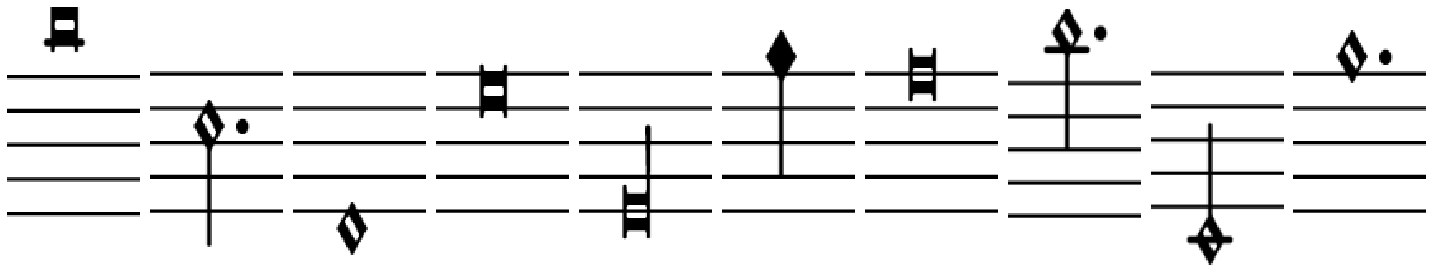

In [8]:
##### Show example of image dataset

# initialize image dimensions
IMAGE_DIMS = (158, 80, 1)

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dir_dataset)))
random.seed(41)
random.shuffle(imagePaths)

# initialize the data and labels
data = []

# loop over the input images
for imagePath in imagePaths[:10]:
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    data.append(image)

plotImages(data)